# ***Problem Defenition***
 ***Overfitting:***

When do we say that overfitting has happened? 

In some situations, the model works perfectly on train data and it has high accuracy, however, it has low accuracy in valid and test data! In these situations, we say the model has been overfitted!





# ***Solution***
**Some methods to avoid overfitting**

- Cross-validation
- Train with more data
- Remove features
- Adding drop out
- Early stopping
- Regularization

**My choices in this implimentation**

- Reduce the capacity of the network (Simplifying the model)
- Add weight regularization
- Early stopping

Sources:
1.   https://elitedatascience.com/overfitting-in-machine-learning
2.   https://keras.rstudio.com/articles/tutorial_overfit_underfit.html
3. https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323

# ***Solve the problem for classification in Keras***

In [0]:
import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
import os
from keras.layers import Flatten, Dense, Concatenate
from keras.optimizers import SGD
from keras.layers import Input
from keras.models import Model

import matplotlib.pyplot as plt
from prettytable import PrettyTable
from tensorflow.keras import regularizers
import tensorflow as tf
from keras import backend as K
from sklearn.metrics import roc_auc_score

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
#Reading the Dataset
# classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalization
X_train = X_train / 255.0
X_test = X_test / 255.0
         
#one-hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

170500096/170498071 [==============================] - 11s 0us/step



How to display multiple images in one figure correctly?

https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645

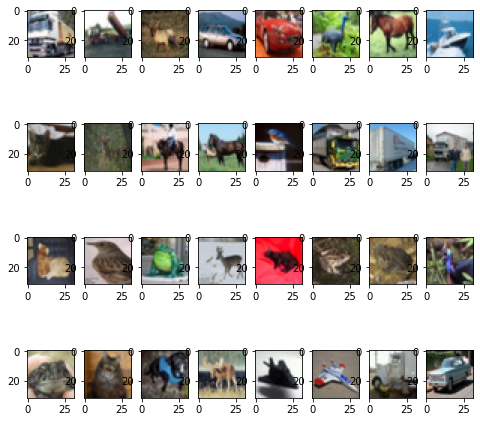

In [0]:
# visualize some (4*8) of the samples in cifar10 train set

fig = plt.figure(figsize=(8, 8))
columns = 8
rows = 4
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
plt.show()

In [0]:
#input layer
input_img = Input(shape = (32, 32, 3))

***baseline model***

In [0]:
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model = Model(inputs = input_img, outputs = out)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        4160      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        4160

***Adding dropout to baseline model***

In [0]:
#architecture 1 - with dropout = 0.2 - model 1

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Dropout(0.2)(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model1 = Model(inputs = input_img, outputs = out)
print(model1.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1024

In [0]:
#architecture 1-2 - with dropout = 0.3 - model 1_2

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.3)(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.3)(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.3)(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Dropout(0.3)(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model1_2 = Model(inputs = input_img, outputs = out)
print(model1_2.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        1024

In [0]:
#architecture 1-3 - with dropout = 0.4 - model 1_3

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.4)(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.3)(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.4)(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Dropout(0.4)(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model1_3 = Model(inputs = input_img, outputs = out)
print(model1_3.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 64)        1024

In [0]:
#architecture 1-4 - with dropout = 0.5 - model 1_4

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.5)(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.3)(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = Dropout(0.5)(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Dropout(0.5)(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model1_4 = Model(inputs = input_img, outputs = out)
print(model1_4.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1024

***Adding Regularization to basline model***

In [0]:
#architecture 1-5 - with keras.regularizers.l1 - model 1_5

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01))(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01))(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01))(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01))(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01))(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model1_5 = Model(inputs = input_img, outputs = out)
print(model1_5.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 64)        4160

In [0]:
#architecture 1-6 - with keras.regularizers.l2 - model 1_6

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model1_6 = Model(inputs = input_img, outputs = out)
print(model1_6.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 64)        4160

In [0]:
#architecture 1-7 - with keras.regularizers.l1_l2 - model 1_7

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model1_7 = Model(inputs = input_img, outputs = out)
print(model1_7.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 32, 32, 64)        4160

***Using early stoping on the basline model***

In [0]:
#architecture 1-8 - model1_8

# Set callback functions to early stop training and save the best model
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model1_8 = Model(inputs = input_img, outputs = out)
print(model1_8.summary())

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 32, 32, 64)        416

In [0]:
#architecture 1-9 - model1_9

# Set callback functions to early stop training and save the best model
#good link for reading more details: https://stackoverflow.com/questions/43906048/which-parameters-should-be-used-for-early-stopping
my_callbacks = [tf.keras.callbacks.EarlyStopping(min_delta=-1, patience=6)]

tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)
tower_1 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_1)
tower_1 = MaxPooling2D((3,3), strides=(1,1), padding='same')(tower_1)
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_1)

output = Flatten()(tower_1)
out    = Dense(10, activation='softmax')(output)

model1_9 = Model(inputs = input_img, outputs = out)
print(model1_9.summary())

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 64)        4160      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 32, 32, 64)        416

***Train models***

In [0]:
# train baseline

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 53s 1ms/step - loss: 1.7045 - accuracy: 0.3903 - auc: 0.7364 - recall: 0.0618 - precision: 0.5711 - val_loss: 1.3415 - val_accuracy: 0.5205 - val_auc: 0.8297 - val_recall: 0.1539 - val_precision: 0.6794
Epoch 2/25
50000/50000 [==============================] - 46s 923us/step - loss: 1.2483 - accuracy: 0.5599 - auc: 0.8571 - recall: 0.2146 - precision: 0.7003 - val_loss: 1.1235 - val_accuracy: 0.5991 - val_auc: 0.8767 - val_recall: 0.2676 - val_precision: 0.7194
Epoch 3/25
50000/50000 [==============================] - 46s 921us/step - loss: 1.0279 - accuracy: 0.6426 - auc: 0.8903 - recall: 0.3101 - precision: 0.7334 - val_loss: 1.0059 - val_accuracy: 0.6475 - val_auc: 0.9011 - val_recall: 0.3475 - val_precision: 0.7451
Epoch 4/25
50000/50000 [==============================] - 46s 921us/step - loss: 0.8923 - accuracy: 0.6914 - auc: 0.9096 - recall: 0.3790 - precision: 0.7547 - val

In [0]:
# train model1

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.8165 - accuracy: 0.3518 - auc_1: 0.7301 - recall_1: 0.0428 - precision_1: 0.5472 - val_loss: 1.6482 - val_accuracy: 0.4409 - val_auc_1: 0.7993 - val_recall_1: 0.0840 - val_precision_1: 0.6397
Epoch 2/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.4693 - accuracy: 0.4760 - auc_1: 0.8221 - recall_1: 0.1195 - precision_1: 0.6621 - val_loss: 1.4280 - val_accuracy: 0.4947 - val_auc_1: 0.8408 - val_recall_1: 0.1573 - val_precision_1: 0.6779
Epoch 3/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.2887 - accuracy: 0.5376 - auc_1: 0.8537 - recall_1: 0.1875 - precision_1: 0.6895 - val_loss: 1.2708 - val_accuracy: 0.5596 - val_auc_1: 0.8647 - val_recall_1: 0.2159 - val_precision_1: 0.6997
Epoch 4/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.1708 - accuracy: 0.5857 - auc_1: 0.8734 - recall_1

In [0]:
# train model1_2

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1_2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history1_2 = model1_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model1_2.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.8130 - accuracy: 0.3562 - auc_2: 0.7403 - recall_2: 0.0478 - precision_2: 0.5697 - val_loss: 1.7552 - val_accuracy: 0.4175 - val_auc_2: 0.7985 - val_recall_2: 0.0833 - val_precision_2: 0.6420
Epoch 2/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.5389 - accuracy: 0.4520 - auc_2: 0.8164 - recall_2: 0.1096 - precision_2: 0.6582 - val_loss: 1.5700 - val_accuracy: 0.4469 - val_auc_2: 0.8316 - val_recall_2: 0.1359 - val_precision_2: 0.6681
Epoch 3/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.3913 - accuracy: 0.5019 - auc_2: 0.8423 - recall_2: 0.1574 - precision_2: 0.6754 - val_loss: 1.4564 - val_accuracy: 0.5062 - val_auc_2: 0.8517 - val_recall_2: 0.1779 - val_precision_2: 0.6845
Epoch 4/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.2807 - accuracy: 0.5460 - auc_2: 0.8592 - recall_2

In [0]:
# train model1_3

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1_3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history1_3 = model1_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model1_3.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.8137 - accuracy: 0.3519 - auc_3: 0.7248 - recall_3: 0.0434 - precision_3: 0.5421 - val_loss: 1.7921 - val_accuracy: 0.3783 - val_auc_3: 0.7967 - val_recall_3: 0.0861 - val_precision_3: 0.6293
Epoch 2/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.4825 - accuracy: 0.4681 - auc_3: 0.8186 - recall_3: 0.1182 - precision_3: 0.6463 - val_loss: 1.5108 - val_accuracy: 0.4828 - val_auc_3: 0.8365 - val_recall_3: 0.1488 - val_precision_3: 0.6631
Epoch 3/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.3326 - accuracy: 0.5227 - auc_3: 0.8485 - recall_3: 0.1740 - precision_3: 0.6757 - val_loss: 1.4710 - val_accuracy: 0.5078 - val_auc_3: 0.8582 - val_recall_3: 0.1973 - val_precision_3: 0.6867
Epoch 4/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.2248 - accuracy: 0.5637 - auc_3: 0.8660 - recall_3

In [0]:
# train model1_4

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1_4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history1_4 = model1_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model1_4.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.8225 - accuracy: 0.3527 - auc_4: 0.7381 - recall_4: 0.0472 - precision_4: 0.5607 - val_loss: 1.8451 - val_accuracy: 0.3924 - val_auc_4: 0.7939 - val_recall_4: 0.0822 - val_precision_4: 0.6297
Epoch 2/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.5524 - accuracy: 0.4455 - auc_4: 0.8114 - recall_4: 0.1053 - precision_4: 0.6407 - val_loss: 1.8082 - val_accuracy: 0.3649 - val_auc_4: 0.8247 - val_recall_4: 0.1287 - val_precision_4: 0.6531
Epoch 3/25
50000/50000 [==============================] - 57s 1ms/step - loss: 1.4218 - accuracy: 0.4920 - auc_4: 0.8338 - recall_4: 0.1470 - precision_4: 0.6598 - val_loss: 1.7040 - val_accuracy: 0.4332 - val_auc_4: 0.8424 - val_recall_4: 0.1645 - val_precision_4: 0.6676
Epoch 4/25
50000/50000 [==============================] - 56s 1ms/step - loss: 1.3372 - accuracy: 0.5212 - auc_4: 0.8490 - recall_4

In [0]:
# train model1_5

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1_5.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history1_5 = model1_5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model1_5.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 47s 935us/step - loss: 10.9574 - accuracy: 0.2514 - auc_5: 0.6649 - recall_5: 0.0020 - precision_5: 0.4984 - val_loss: 3.1633 - val_accuracy: 0.2902 - val_auc_5: 0.7078 - val_recall_5: 0.0041 - val_precision_5: 0.5790
Epoch 2/25
50000/50000 [==============================] - 47s 931us/step - loss: 2.3259 - accuracy: 0.2920 - auc_5: 0.7187 - recall_5: 0.0066 - precision_5: 0.5719 - val_loss: 2.1018 - val_accuracy: 0.3141 - val_auc_5: 0.7272 - val_recall_5: 0.0089 - val_precision_5: 0.5824
Epoch 3/25
50000/50000 [==============================] - 46s 930us/step - loss: 2.0959 - accuracy: 0.3055 - auc_5: 0.7329 - recall_5: 0.0105 - precision_5: 0.5951 - val_loss: 2.0551 - val_accuracy: 0.3132 - val_auc_5: 0.7376 - val_recall_5: 0.0126 - val_precision_5: 0.5985
Epoch 4/25
50000/50000 [==============================] - 47s 930us/step - loss: 2.0563 - accuracy: 0.3105 - auc_5: 0.7413 -

In [0]:
# train model1_6

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1_6.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history1_6 = model1_6.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model1_6.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 47s 940us/step - loss: 3.7757 - accuracy: 0.3613 - auc_6: 0.7198 - recall_6: 0.0390 - precision_6: 0.5632 - val_loss: 3.0009 - val_accuracy: 0.4567 - val_auc_6: 0.8082 - val_recall_6: 0.1052 - val_precision_6: 0.6808
Epoch 2/25
50000/50000 [==============================] - 47s 938us/step - loss: 2.5918 - accuracy: 0.4953 - auc_6: 0.8337 - recall_6: 0.1475 - precision_6: 0.6897 - val_loss: 2.2680 - val_accuracy: 0.5240 - val_auc_6: 0.8507 - val_recall_6: 0.1829 - val_precision_6: 0.6986
Epoch 3/25
50000/50000 [==============================] - 47s 939us/step - loss: 2.0376 - accuracy: 0.5427 - auc_6: 0.8618 - recall_6: 0.2102 - precision_6: 0.7084 - val_loss: 1.8458 - val_accuracy: 0.5633 - val_auc_6: 0.8708 - val_recall_6: 0.2340 - val_precision_6: 0.7157
Epoch 4/25
50000/50000 [==============================] - 47s 940us/step - loss: 1.7237 - accuracy: 0.5745 - auc_6: 0.8777 - 

In [0]:
# train model1_7

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1_7.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])
history1_7 = model1_7.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

scores = model1_7.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 48s 955us/step - loss: 10.5429 - accuracy: 0.2433 - auc_7: 0.6533 - recall_7: 0.0012 - precision_7: 0.4774 - val_loss: 2.4603 - val_accuracy: 0.2936 - val_auc_7: 0.7010 - val_recall_7: 0.0036 - val_precision_7: 0.6327
Epoch 2/25
50000/50000 [==============================] - 47s 946us/step - loss: 2.1796 - accuracy: 0.2896 - auc_7: 0.7153 - recall_7: 0.0055 - precision_7: 0.6172 - val_loss: 2.1002 - val_accuracy: 0.3109 - val_auc_7: 0.7241 - val_recall_7: 0.0065 - val_precision_7: 0.6114
Epoch 3/25
50000/50000 [==============================] - 47s 944us/step - loss: 2.1018 - accuracy: 0.3026 - auc_7: 0.7303 - recall_7: 0.0081 - precision_7: 0.6156 - val_loss: 2.0676 - val_accuracy: 0.3167 - val_auc_7: 0.7353 - val_recall_7: 0.0098 - val_precision_7: 0.6271
Epoch 4/25
50000/50000 [==============================] - 47s 945us/step - loss: 2.0714 - accuracy: 0.3088 - auc_7: 0.7392 -

In [0]:
# train model1_8

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1_8.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()] )
history1_8 = model1_8.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, callbacks = my_callbacks)

scores = model1_8.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 62s 1ms/step - loss: 1.6921 - accuracy: 0.3937 - auc_15: 0.7413 - recall_15: 0.0616 - precision_15: 0.5790 - val_loss: 1.3658 - val_accuracy: 0.5160 - val_auc_15: 0.8326 - val_recall_15: 0.1542 - val_precision_15: 0.6873
Epoch 2/25
50000/50000 [==============================] - 62s 1ms/step - loss: 1.2292 - accuracy: 0.5657 - auc_15: 0.8594 - recall_15: 0.2145 - precision_15: 0.7095 - val_loss: 1.1710 - val_accuracy: 0.5900 - val_auc_15: 0.8787 - val_recall_15: 0.2702 - val_precision_15: 0.7255
Epoch 3/25
50000/50000 [==============================] - 62s 1ms/step - loss: 1.0077 - accuracy: 0.6505 - auc_15: 0.8919 - recall_15: 0.3143 - precision_15: 0.7374 - val_loss: 0.9729 - val_accuracy: 0.6563 - val_auc_15: 0.9031 - val_recall_15: 0.3531 - val_precision_15: 0.7488
Epoch 4/25
50000/50000 [==============================] - 62s 1ms/step - loss: 0.8807 - accuracy: 0.6971 - auc_15

In [0]:
# train model1_9

epochs = 25
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1_9.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(), tf.keras.metrics.Precision()] )
history1_9 = model1_9.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, callbacks = my_callbacks)

scores = model1_9.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 63s 1ms/step - loss: 1.7470 - accuracy: 0.3757 - auc_16: 0.7143 - recall_16: 0.0485 - precision_16: 0.5458 - val_loss: 1.4650 - val_accuracy: 0.4745 - val_auc_16: 0.8170 - val_recall_16: 0.1422 - val_precision_16: 0.6737
Epoch 2/25
50000/50000 [==============================] - 62s 1ms/step - loss: 1.2847 - accuracy: 0.5451 - auc_16: 0.8458 - recall_16: 0.1992 - precision_16: 0.6863 - val_loss: 1.1542 - val_accuracy: 0.5890 - val_auc_16: 0.8677 - val_recall_16: 0.2500 - val_precision_16: 0.7071
Epoch 3/25
50000/50000 [==============================] - 62s 1ms/step - loss: 1.0652 - accuracy: 0.6287 - auc_16: 0.8822 - recall_16: 0.2919 - precision_16: 0.7237 - val_loss: 1.0133 - val_accuracy: 0.6425 - val_auc_16: 0.8941 - val_recall_16: 0.3298 - val_precision_16: 0.7366
Epoch 4/25
50000/50000 [==============================] - 62s 1ms/step - loss: 0.9188 - accuracy: 0.6813 - auc_16

# ***Visualize evaluation after  dropout***

***Visualizing accuracy***

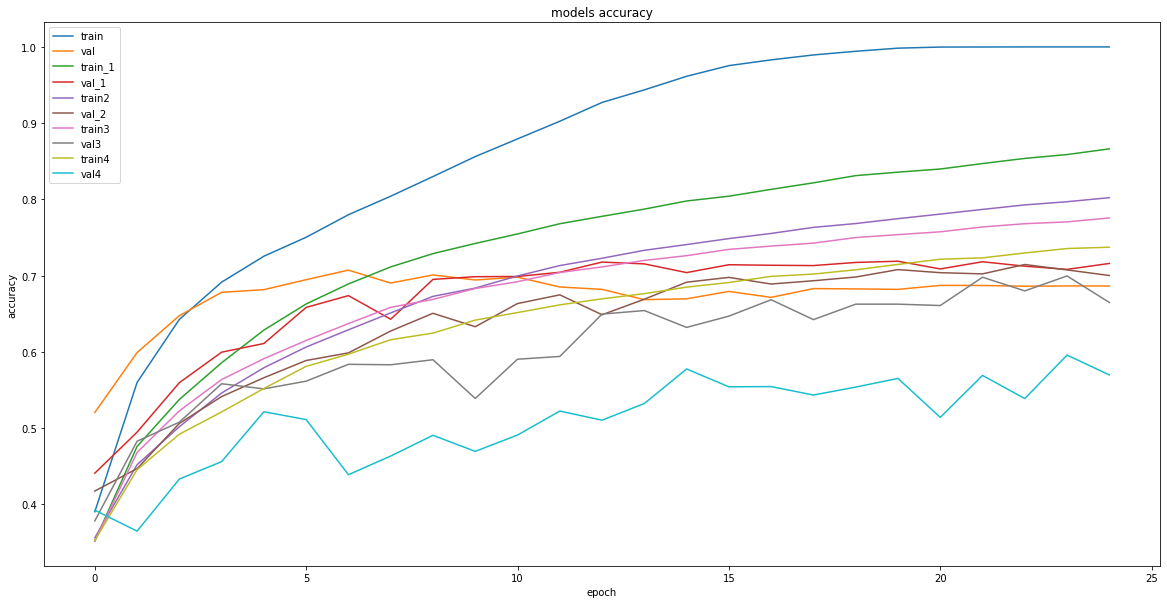

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.plot(history1_2.history['accuracy'])
plt.plot(history1_2.history['val_accuracy'])

plt.plot(history1_3.history['accuracy'])
plt.plot(history1_3.history['val_accuracy'])

plt.plot(history1_4.history['accuracy'])
plt.plot(history1_4.history['val_accuracy'])


plt.title('models accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

#Baseline --> train - val
#model1 --> train1 - val1 - 0.2 dropout
#model1_2 --> train2 - val2 - 0.3 dropout
#model1_3 --> train3 - val3 - 0.4 dropout
#model1_4 --> train4 - val4 - 0.5 dropout
plt.legend(['train', 'val', 'train_1', 'val_1', 'train2' , 'val_2', 'train3', 'val3', 'train4', 'val4'])
plt.show()

Legend:
- Baseline --> train - val
- model1 --> train1 - val1 - 0.2 dropout
- model1_2 --> train2 - val2 - 0.3 dropout
- model1_3 --> train3 - val3 - 0.4 dropout
- model1_4 --> train4 - val4 - 0.5 dropout

My analyse:

Using dropout 0.2 and 0.3 was more useful in this model. 

As you can see in the graph, the accuracy of the validation of the model with 0.2 drop out (which is red) and the accuracy of the validation of the model with 0.3 drop out (which is brown) is more than val accuracy of the baseline (which is orange).

Although the brown line is below the red line, but the dropout 0.3 worked better for avoiding the overfitting.

***Visualizing [AUC](https://keras.io/api/metrics/classification_metrics/#auc-class)***

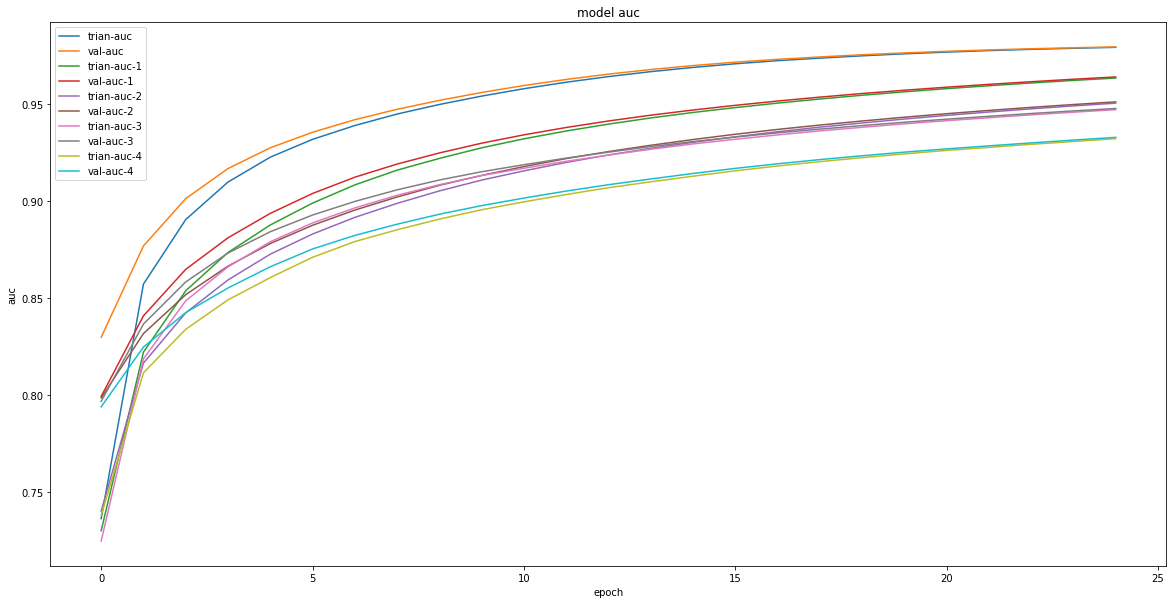

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])

plt.plot(history1.history['auc_1'])
plt.plot(history1.history['val_auc_1'])

plt.plot(history1_2.history['auc_2'])
plt.plot(history1_2.history['val_auc_2'])

plt.plot(history1_3.history['auc_3'])
plt.plot(history1_3.history['val_auc_3'])

plt.plot(history1_4.history['auc_4'])
plt.plot(history1_4.history['val_auc_4'])


plt.title('model auc')

plt.ylabel('auc')
plt.xlabel('epoch')

#Baseline --> train - val
#model1 --> train1 - val1 - 0.2 dropout
#model1_2 --> train2 - val2 - 0.3 dropout
#model1_3 --> train3 - val3 - 0.4 dropout
#model1_4 --> train4 - val4 - 0.5 dropout
plt.legend(['trian-auc', 'val-auc', 'trian-auc-1', 'val-auc-1', 'trian-auc-2','val-auc-2' ,'trian-auc-3','val-auc-3','trian-auc-4','val-auc-4'])
plt.show()

Legend:
- Baseline --> train - val
- model1 --> train1 - val1 - 0.2 dropout
- model1_2 --> train2 - val2 - 0.3 dropout
- model1_3 --> train3 - val3 - 0.4 dropout
- model1_4 --> train4 - val4 - 0.5 dropout

My analyse:

According to auc, using dropout 0.5 is the worth choice. And using dropout 0.2 is the best choice here. However, the baseline model is working better according to auc!

***Visualizing precision and recall***

"Precision and recall are two extremely important model evaluation metrics. While precision refers to the percentage of your results which are relevant, recall refers to the percentage of total relevant results correctly classified by your algorithm.", [ref](https://towardsdatascience.com/precision-vs-recall-386cf9f89488)

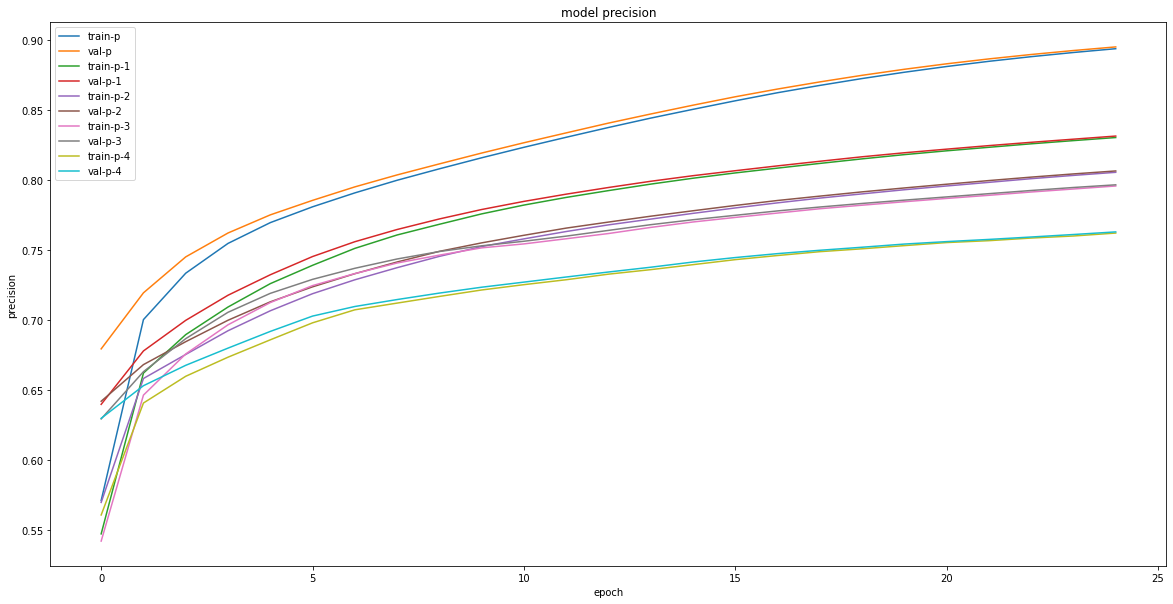

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])

plt.plot(history1.history['precision_1'])
plt.plot(history1.history['val_precision_1'])

plt.plot(history1_2.history['precision_2'])
plt.plot(history1_2.history['val_precision_2'])

plt.plot(history1_3.history['precision_3'])
plt.plot(history1_3.history['val_precision_3'])

plt.plot(history1_4.history['precision_4'])
plt.plot(history1_4.history['val_precision_4'])

plt.title('model precision')

plt.ylabel('precision')
plt.xlabel('epoch')

#Baseline --> train - val
#model1 --> train1 - val1 - 0.2 dropout
#model1_2 --> train2 - val2 - 0.3 dropout
#model1_3 --> train3 - val3 - 0.4 dropout
#model1_4 --> train4 - val4 - 0.5 dropout
plt.legend(['train-p', 'val-p' ,'train-p-1', 'val-p-1' , 'train-p-2', 'val-p-2', 'train-p-3', 'val-p-3', 'train-p-4', 'val-p-4'])
plt.show()

Legend:
- Baseline --> train - val
- model1 --> train1 - val1 - 0.2 dropout
- model1_2 --> train2 - val2 - 0.3 dropout
- model1_3 --> train3 - val3 - 0.4 dropout
- model1_4 --> train4 - val4 - 0.5 dropout


My analyse:


The result in precision graph, is similar to auc graph.

Using dropout 0.5 is the worth choice and nd using dropout 0.2 is the best choice. However, the baseline model is working better according to 

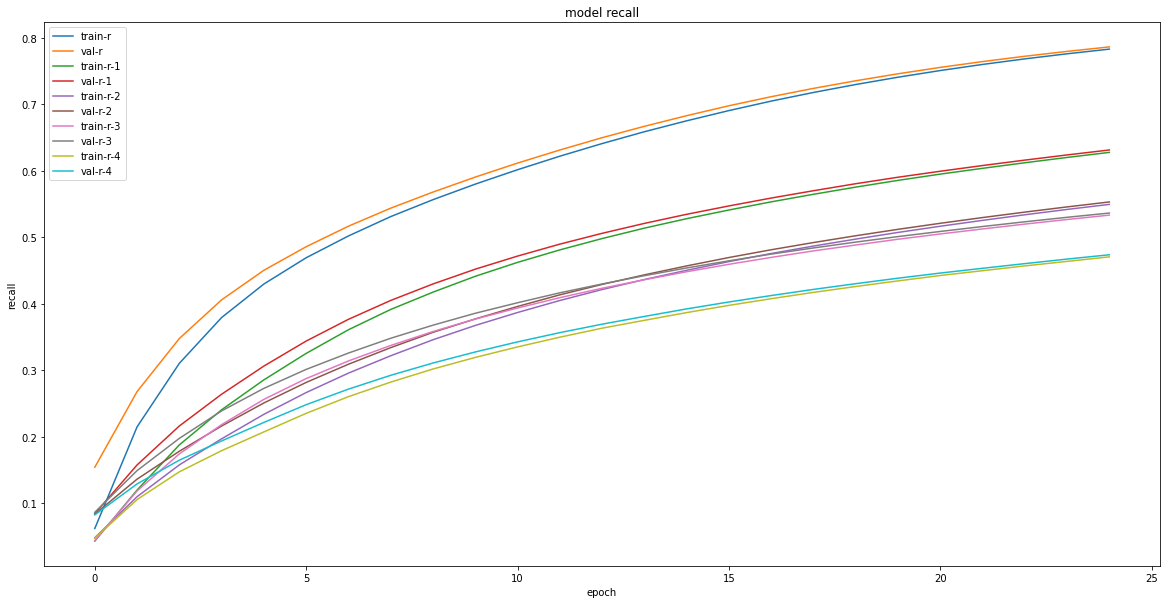

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])

plt.plot(history1.history['recall_1'])
plt.plot(history1.history['val_recall_1'])

plt.plot(history1_2.history['recall_2'])
plt.plot(history1_2.history['val_recall_2'])

plt.plot(history1_3.history['recall_3'])
plt.plot(history1_3.history['val_recall_3'])

plt.plot(history1_4.history['recall_4'])
plt.plot(history1_4.history['val_recall_4'])


plt.title('model recall')

plt.ylabel('recall')
plt.xlabel('epoch')


#Baseline --> train - val
#model1 --> train1 - val1 - 0.2 dropout
#model1_2 --> train2 - val2 - 0.3 dropout
#model1_3 --> train3 - val3 - 0.4 dropout
#model1_4 --> train4 - val4 - 0.5 dropout
plt.legend(['train-r', 'val-r','train-r-1', 'val-r-1', 'train-r-2', 'val-r-2','train-r-3', 'val-r-3', 'train-r-4', 'val-r-4'])
plt.show()

Legend:
- Baseline --> train - val
- model1 --> train1 - val1 - 0.2 dropout
- model1_2 --> train2 - val2 - 0.3 dropout
- model1_3 --> train3 - val3 - 0.4 dropout
- model1_4 --> train4 - val4 - 0.5 dropout


My analyse:

Same as auc and precision, using 0.2 dropout is the best choice and the baseline model is working better! 


# ***Visualize evaluation after Regurarization***

***Visualizing accuracy***

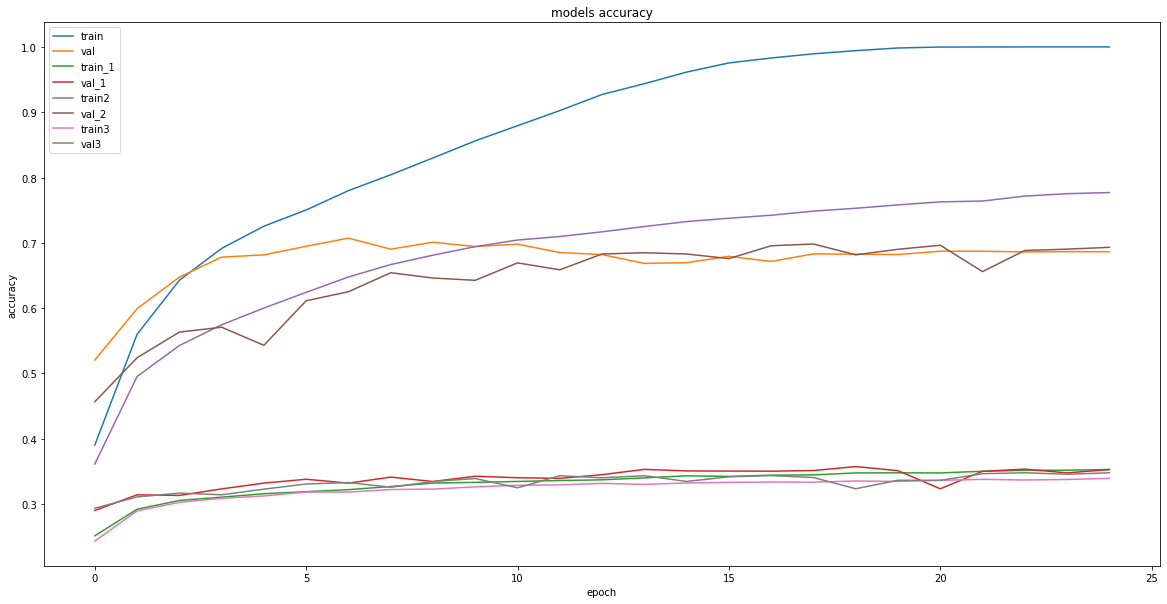

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.plot(history1_5.history['accuracy'])
plt.plot(history1_5.history['val_accuracy'])

plt.plot(history1_6.history['accuracy'])
plt.plot(history1_6.history['val_accuracy'])

plt.plot(history1_7.history['accuracy'])
plt.plot(history1_7.history['val_accuracy'])

plt.title('models accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

#Baseline --> train - val
#model1_5 --> train1 - val1 -l1reg
#model1_6 --> train2 - val2 -l2reg
#model1_7 --> train3 - val3 -l1-l2reg
plt.legend(['train', 'val', 'train_1', 'val_1', 'train2' , 'val_2', 'train3', 'val3'])
plt.show()

Legend:

- Baseline --> train - val
- model1_5 --> train1 - val1 -l1reg
- model1_6 --> train2 - val2 -l2reg
- model1_7 --> train3 - val3 -l1-l2reg

My analyse:

According to the graph above, the accuracy of the model, after using l2 regularization, increased. It also decreased the overfitting. (Both changes was not too much)

Using l1 and l1-l2 regularization made the model to be overfitted. Therefore, it is not good to use l1 and l1-l2 regularization in this model.

***Visualizing AUC***

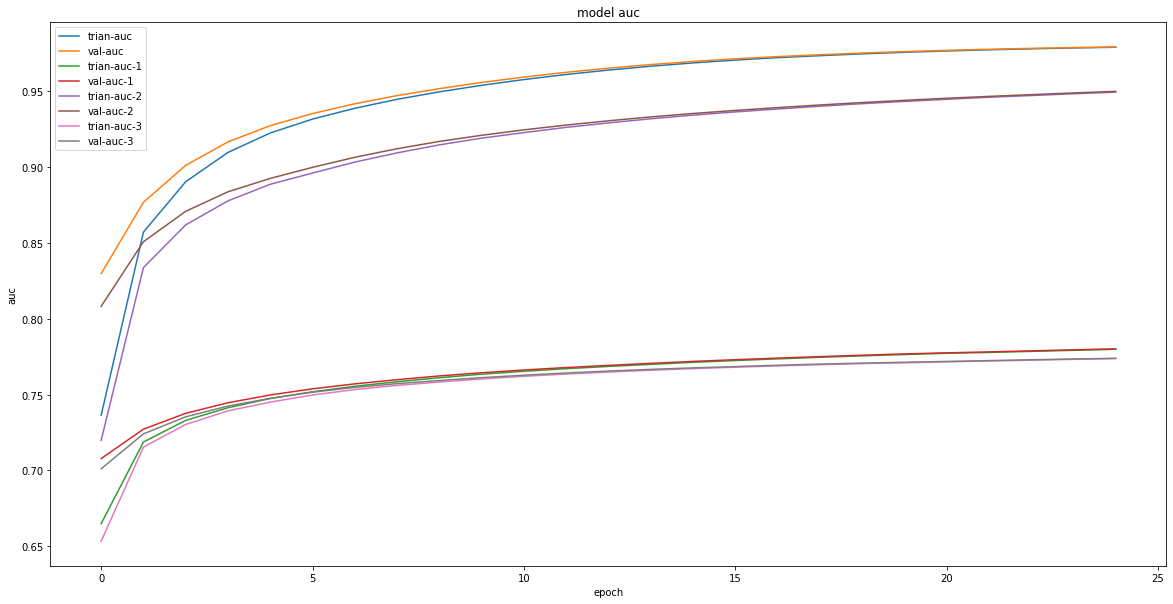

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])

plt.plot(history1_5.history['auc_5'])
plt.plot(history1_5.history['val_auc_5'])

plt.plot(history1_6.history['auc_6'])
plt.plot(history1_6.history['val_auc_6'])

plt.plot(history1_7.history['auc_7'])
plt.plot(history1_7.history['val_auc_7'])


plt.title('model auc')

plt.ylabel('auc')
plt.xlabel('epoch')

#Baseline --> train - val
#model1_5 --> train1 - val1 -l1reg
#model1_6 --> train2 - val2 -l2reg
#model1_7 --> train3 - val3 -l1-l2reg
plt.legend(['trian-auc', 'val-auc','trian-auc-1', 'val-auc-1', 'trian-auc-2','val-auc-2' ,'trian-auc-3','val-auc-3'])
plt.show()

Legend:

- Baseline --> train - val
- model1_5 --> train1 - val1 -l1reg
- model1_6 --> train2 - val2 -l2reg
- model1_7 --> train3 - val3 -l1-l2reg

My analyse:

According to auc graph, the baseline model is working well!
However, by using l2 regularization, the overfit will not happen. And it is better to use l2 compared to l1 and l1-l2.

It is obvious that using l1 and l1-l2 regularization is not good. Because you can see that they made the model to be overfitted.

***Visualizing precision and recall***

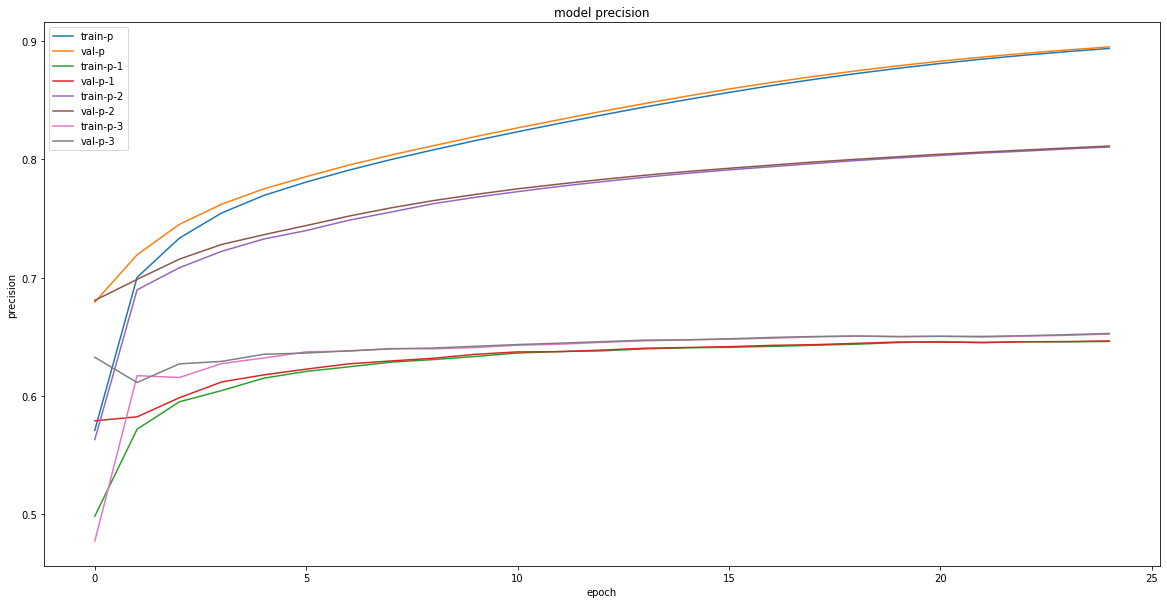

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])

plt.plot(history1_5.history['precision_5'])
plt.plot(history1_5.history['val_precision_5'])

plt.plot(history1_6.history['precision_6'])
plt.plot(history1_6.history['val_precision_6'])

plt.plot(history1_7.history['precision_7'])
plt.plot(history1_7.history['val_precision_7'])

plt.title('model precision')

plt.ylabel('precision')
plt.xlabel('epoch')

#Baseline --> train - val
#model1_5 --> train1 - val1 -l1reg
#model1_6 --> train2 - val2 -l2reg
#model1_7 --> train3 - val3 -l1-l2reg
plt.legend(['train-p', 'val-p' ,'train-p-1', 'val-p-1' , 'train-p-2', 'val-p-2', 'train-p-3', 'val-p-3'])
plt.show()


Legend:

- Baseline --> train - val
- model1_5 --> train1 - val1 -l1reg
- model1_6 --> train2 - val2 -l2reg
- model1_7 --> train3 - val3 -l1-l2reg

My analyse:

According to the precision,  the baseline model is working well! However, by using l2 regularization, the overfit has not happened. And it is better to use l2 regularization compared to l1 and l1-l2.

Using l1 and l1-l2 regularization made the model's precision less and l1 is the worth choice.

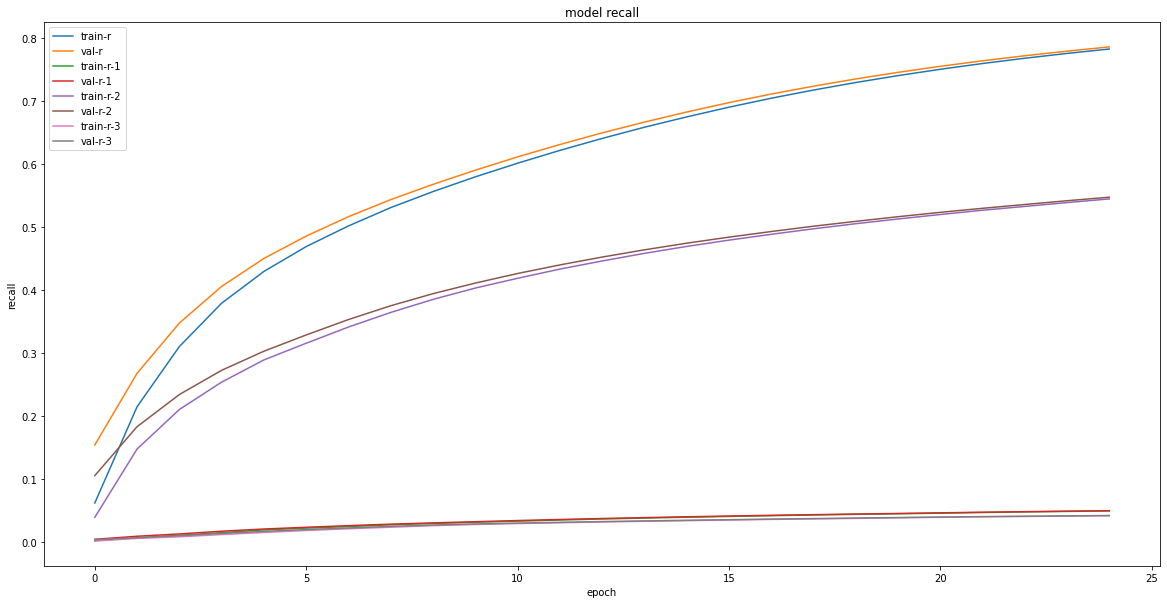

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])

plt.plot(history1_5.history['recall_5'])
plt.plot(history1_5.history['val_recall_5'])

plt.plot(history1_6.history['recall_6'])
plt.plot(history1_6.history['val_recall_6'])

plt.plot(history1_7.history['recall_7'])
plt.plot(history1_7.history['val_recall_7'])

plt.title('model recall')

plt.ylabel('recall')
plt.xlabel('epoch')


#Baseline --> train - val
#model1_5 --> train1 - val1 -l1reg
#model1_6 --> train2 - val2 -l2reg
#model1_7 --> train3 - val3 -l1-l2reg

plt.legend(['train-r', 'val-r','train-r-1', 'val-r-1', 'train-r-2', 'val-r-2','train-r-3', 'val-r-3'])
plt.show()

Legend:

- Baseline --> train - val
- model1_5 --> train1 - val1 -l1reg
- model1_6 --> train2 - val2 -l2reg
- model1_7 --> train3 - val3 -l1-l2reg

My analyse:

The result is similar to the precision and using l1 and l1-l2 are both the worth choices.

# ***Visualize evaluation after  using early stopping***

***Accuracy***

For model 8 with patience=2

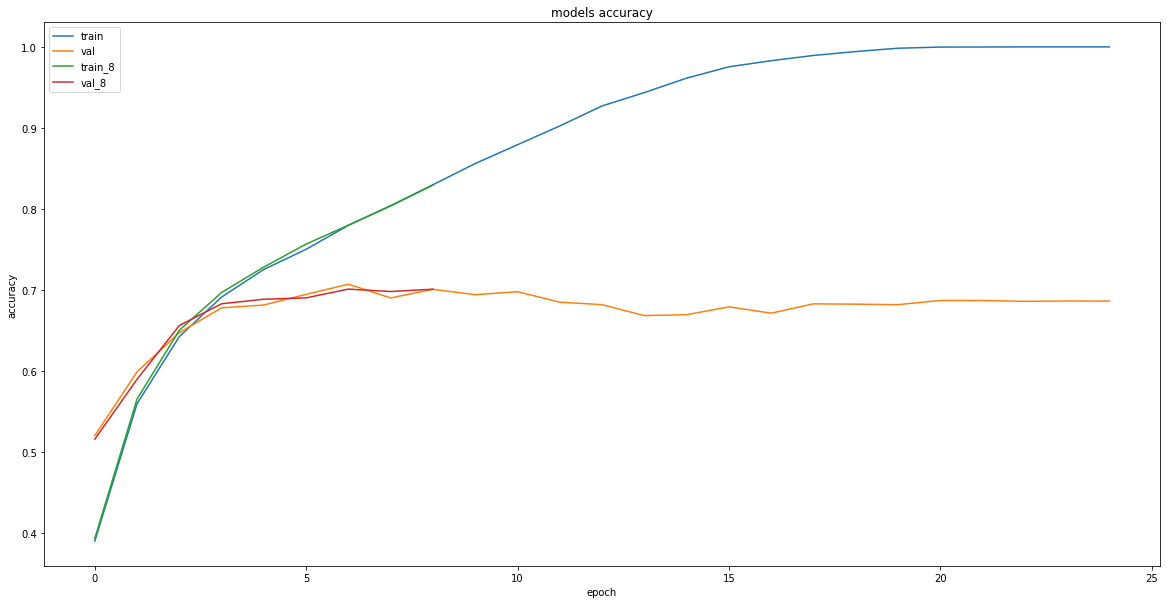

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.plot(history1_8.history['accuracy'])
plt.plot(history1_8.history['val_accuracy'])

plt.title('models accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

#Baseline --> train - val
#model1_8 --> train8 - val8
plt.legend(['train', 'val', 'train_8', 'val_8'])
plt.show()

Legend:
- Baseline --> train - val
- model1_8 --> train8 - val8

My analyse:

According to accuracy, early stoping helped the model to avoid overfitting by stopping soon.

***AUC***

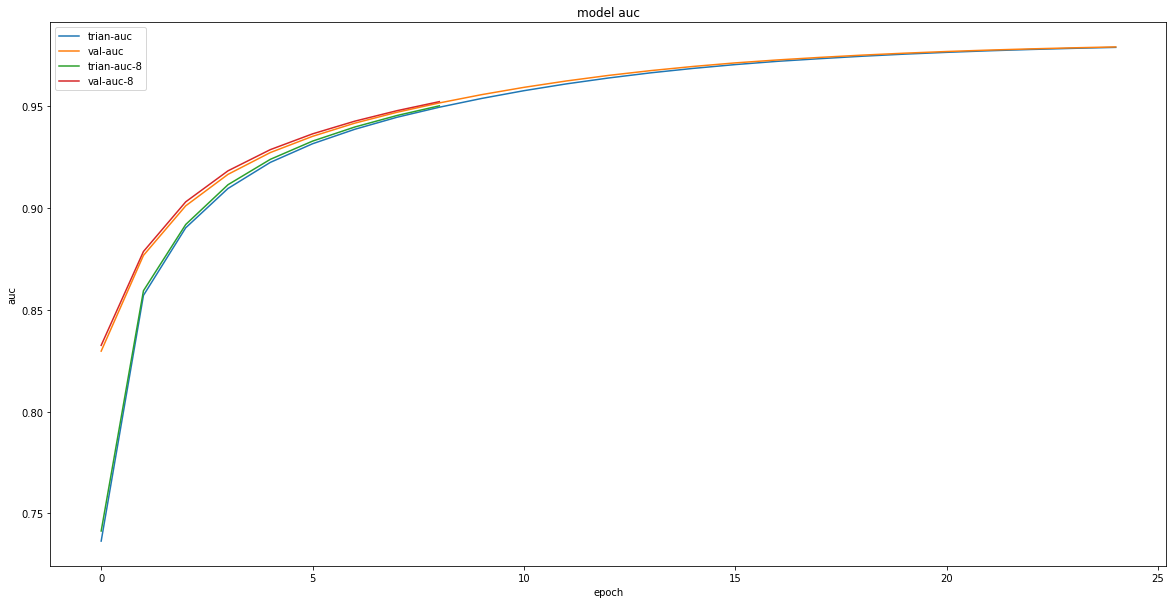

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])

plt.plot(history1_8.history['auc_15'])
plt.plot(history1_8.history['val_auc_15'])

plt.title('model auc')

plt.ylabel('auc')
plt.xlabel('epoch')

#Baseline --> train - val
#model1_8 --> train8 - val8
plt.legend(['trian-auc', 'val-auc','trian-auc-8', 'val-auc-8'])
plt.show()

Legend:
- Baseline --> train - val
- model1_8 --> train8 - val8

My analyse:

However, according to auc, the stop was too early. We can use hadcraft early stopping to have better choice for the stop place in training.
We can also choose better input parameters to have a better result.

***Precision and recall***

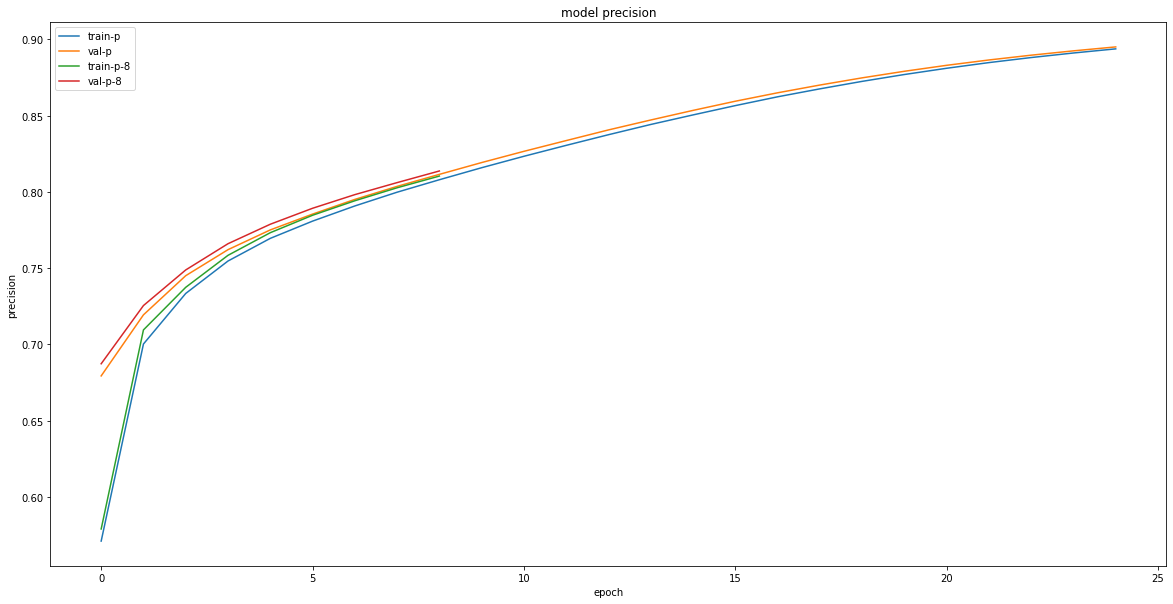

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])

plt.plot(history1_8.history['precision_15'])
plt.plot(history1_8.history['val_precision_15'])

plt.title('model precision')

plt.ylabel('precision')
plt.xlabel('epoch')

#Baseline --> train - val
#model1_8 --> train8 - val8

plt.legend(['train-p', 'val-p' ,'train-p-8', 'val-p-8'])
plt.show()


My explain for this graph is similar to the auc.

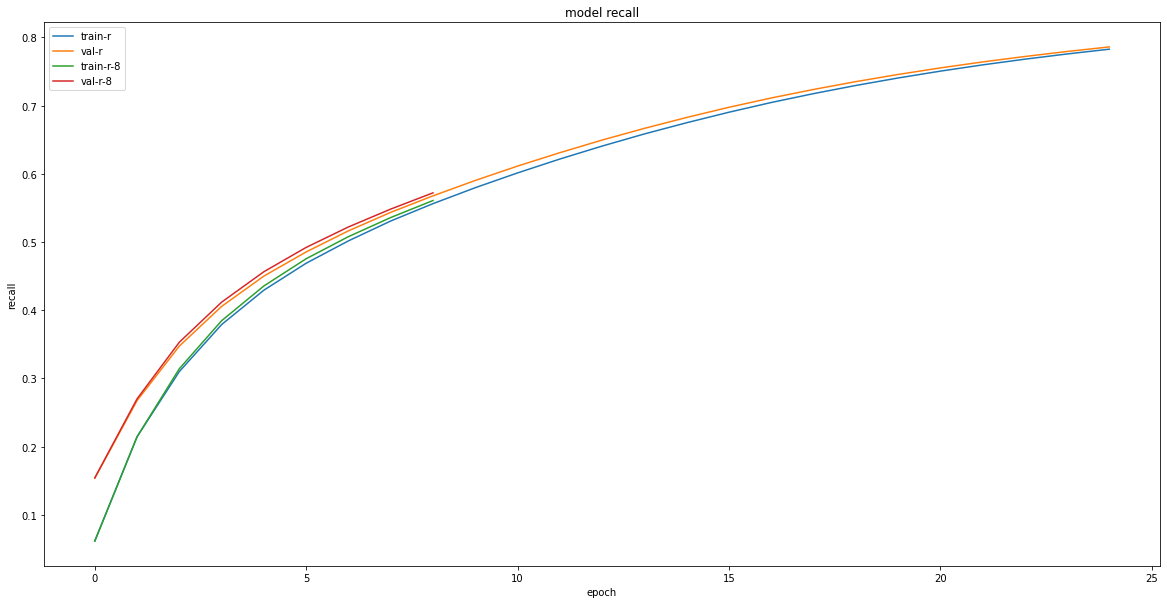

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])

plt.plot(history1_8.history['recall_15'])
plt.plot(history1_8.history['val_recall_15'])

plt.title('model recall')

plt.ylabel('recall')
plt.xlabel('epoch')

#Baseline --> train - val
#model1_8 --> train8 - val8

plt.legend(['train-r', 'val-r','train-r-8', 'val-r-8'])
plt.show()

My explain for this graph is similar to the auc.

**For model 9**, with patience=6 and min_delta=-1, the precision and recall graph did not show better performance as you can see below.

***Precision and recall for model nine***

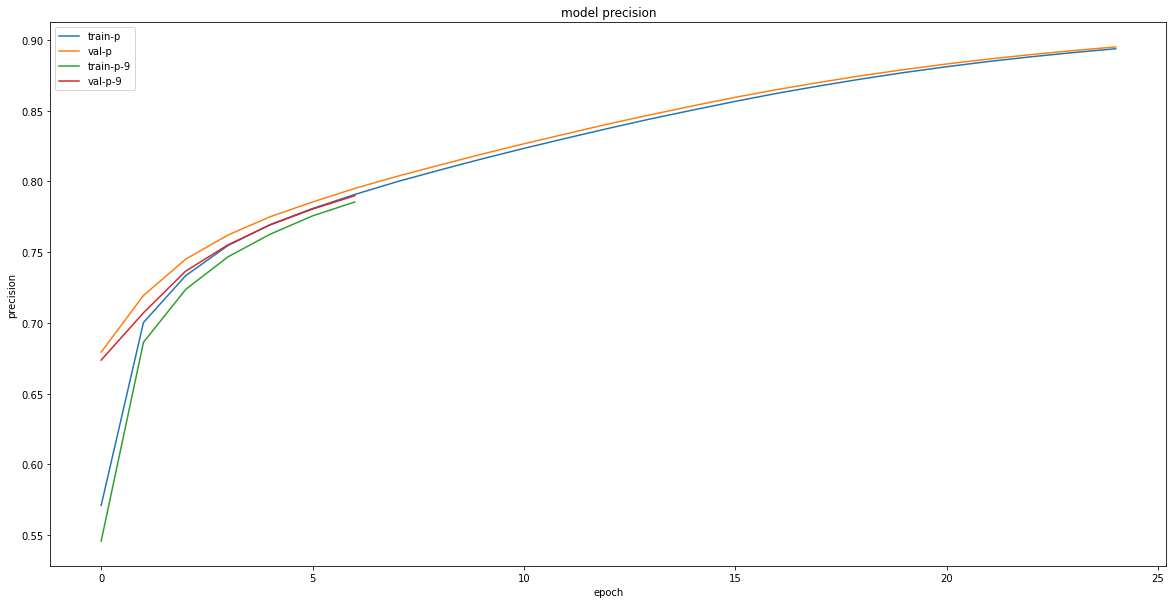

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])

plt.plot(history1_9.history['precision_16'])
plt.plot(history1_9.history['val_precision_16'])

plt.title('model precision')

plt.ylabel('precision')
plt.xlabel('epoch')

#Baseline --> train - val
#model1_8 --> train9 - val9

plt.legend(['train-p', 'val-p' ,'train-p-9', 'val-p-9'])
plt.show()

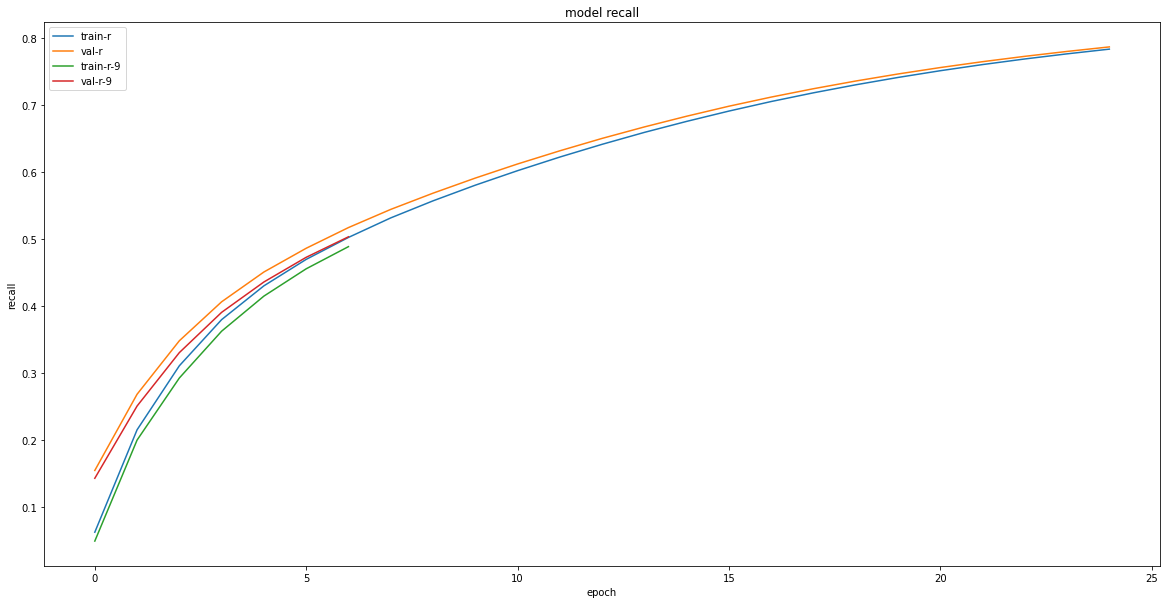

In [0]:
plt.figure(figsize=(20,10))

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])

plt.plot(history1_9.history['recall_16'])
plt.plot(history1_9.history['val_recall_16'])

plt.title('model recall')

plt.ylabel('recall')
plt.xlabel('epoch')

#Baseline --> train - val
#model1_9 --> train9 - val9

plt.legend(['train-r', 'val-r','train-r-9', 'val-r-9'])
plt.show()

# **Conclusion**

In this experiment, some of the actions for avoiding overfitting, made the model to be underfitted! Therefore, not all of the actions are useful in all the models. 

The early stopping can be useful, if we choose the best parameters or we use handcraft early stopping.

I'll also show the best and worth choices for dropout and regularization in my experiment below.

In [0]:
from prettytable import PrettyTable

pt = PrettyTable()
pt_2 = PrettyTable()

#drop out  ✔
pt.field_names =  ["Dropout", "0.2", "0.3" , "0.4" , "0.5"]

#0.3 can also be a good choice, not the best
pt.add_row(["best choice","✔", " ", " ", " "])
pt.add_row(["worth choice"," ", " ", " ", "✔"])

#regularization
pt_2.field_names = ["Regularization" , "l1" , "l2", "l1-l2"]
pt_2.add_row(["best choice", " ", "✔",  " "])
pt_2.add_row(["worth choice","✔", " ", "✔"])


print(pt)
print("\n")
print(pt_2)

+--------------+-----+-----+-----+-----+
|   Dropout    | 0.2 | 0.3 | 0.4 | 0.5 |
+--------------+-----+-----+-----+-----+
| best choice  |  ✔  |     |     |     |
| worth choice |     |     |     |  ✔  |
+--------------+-----+-----+-----+-----+


+----------------+----+----+-------+
| Regularization | l1 | l2 | l1-l2 |
+----------------+----+----+-------+
|  best choice   |    | ✔  |       |
|  worth choice  | ✔  |    |   ✔   |
+----------------+----+----+-------+
